Todo: write an introduction

In [36]:
from IPython.display import SVG, Image, display_html
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import AllChem, Draw
import nglview

First, we model the serine side chain as a simple OCC chain.

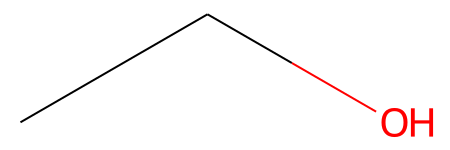

In [2]:
ser_side_chain=Chem.MolFromSmiles('OCC')
ser_side_chain

One possible rhomboid ligand is 2-\[(E)-2-(2-chlorophenyl)ethenyl\]-3,1-benzoxazin-4-one.
The ketone group on the benzoxazine is subject to a nucleophilic attack by the serine side chain.

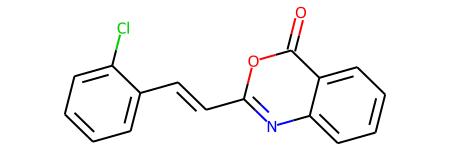

In [3]:
bza4_smi = "C1=CC=C(C(=C1)/C=C/C2=NC3=CC=CC=C3C(=O)O2)Cl"
bza4_lig = Chem.MolFromSmiles(bza4_smi)
bza4_lig

In [4]:
rhomboid_rx_smarts = {
    'bza-one-na':[
        '[c:1]1(=[O:7]):[c:2]:[c:3]:[n:4]:[c:5]:[o:6]:1'
        '.[O:20]-[C:21]-[C:22]'
        '>>[O:20](-[C:21]-[C:22])-[C:1](=[O:7])-[c:2]:[c:3]-[N:4]-[C:5]=[O:6]']
}

bza-one-na


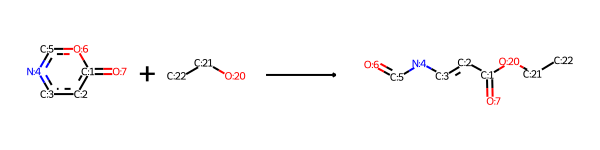

In [5]:
rhomboid_reactions = {k: [AllChem.ReactionFromSmarts(vi) for vi in v] for k,v in rhomboid_rx_smarts.items()}
for nm,rx in rhomboid_reactions.items():
    print(nm)
    for rxi in rx:
        display(rxi)

In [6]:
def ligand_rx(lig):
    display(rhomboid_reactions['bza-one-na'][0])
    display(lig)
    Chem.SanitizeMol(lig)
    prods=rhomboid_reactions['bza-one-na'][0].RunReactants((lig,ser_side_chain))
    print(len(prods))
    #print(Chem.MolToSmiles(prods[0][0]))
    Chem.SanitizeMol(prods[0][0])
    print(Chem.MolToSmiles(prods[0][0]))
    display(prods[0][0] )
    return prods

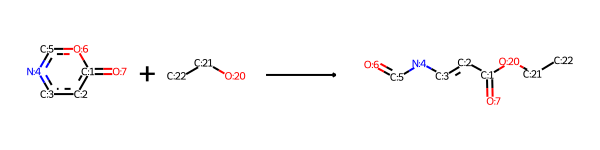

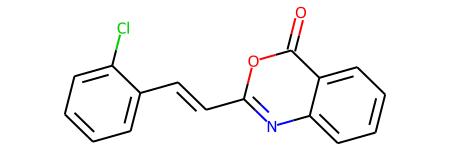

1
CCOC(=O)c1ccccc1NC(=O)/C=C/c1ccccc1Cl


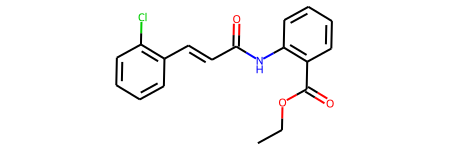

In [7]:
prods =  ligand_rx(bza4_lig)

For covalent docking, it will be helpful to consistently generate the molecule in such a way that the sidechain atoms CCO are the first three. 

In [8]:
rootAtom=-1
for a in prods[0][0].GetAtoms():
    props = a.GetPropsAsDict()
    if 'old_mapno' in props and props['old_mapno'] == 22:
        idx = Chem.Atom.GetIdx(a)
        root_atom = idx
        break
smi2 =  Chem.MolToSmiles(prods[0][0],rootedAtAtom=rootAtom)
smi2

'CCOC(=O)c1ccccc1NC(=O)/C=C/c1ccccc1Cl'

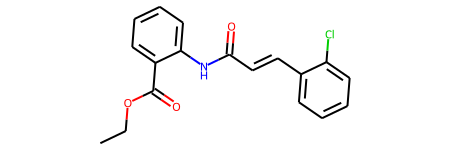

In [9]:
mol=Chem.MolFromSmiles(smi2)
mol

Now we must generate a 3D embedding of the molecule.
For the purpose of docking, the embedding can be based on reasonable bond lengths
generated by RDKit's implementation of the ETKDG method, 
but it is also possible to optimize the geometry with QM.

In [10]:
def embed_single_mol(mol: Chem.Mol, max_embed_attempts=50, remove_h=False):
    mol_h = Chem.AddHs(mol)
    try:
        embedded = AllChem.EmbedMolecule(mol_h, maxAttempts=max_embed_attempts)
    except Exception as e:
        print("Exception occurred during embedding")
        print(e)
        return None
    if embedded < 0:
        # print(f"Embedding failed")
        return None
    if remove_h:
        mol_out = Chem.RemoveHs(mol_h)
    else:
        mol_out = mol_h
    return mol_out

In [11]:
emb_mol = embed_single_mol(mol)

In [30]:
view=nglview.show_rdkit(emb_mol)
view

NGLWidget()

In [35]:
rend=view.render_image()
rend

Image(value=b'', width='99%')

In [37]:
display_html(rend)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0f0\x00\x00\x04\xb0\x08\x06\x00\x00\x00.\x05=\x8a\x…

In [ ]:
rend.